# Prodigy_ML_01

## House Price Prediction using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data=pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
X=data[['LotArea','FullBath','HalfBath', 'BedroomAbvGr']]
y=data['SalePrice']
X1=data[['LotArea','FullBath','HalfBath', 'BedroomAbvGr','SalePrice']]

### Data Preprocessing

In [7]:
X1.isna().sum()

LotArea         0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [8]:
X.describe()

,LotArea,FullBath,HalfBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1.565068,0.382877,2.866438
std,9981.264932,0.550916,0.502885,0.815778
min,1300.000000,0.000000,0.000000,0.000000
25%,7553.500000,1.000000,0.000000,2.000000
50%,9478.500000,2.000000,0.000000,3.000000
75%,11601.500000,2.000000,1.000000,3.000000
max,215245.000000,3.000000,2.000000,8.000000


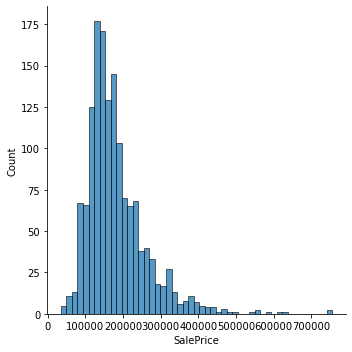

In [9]:
sns.displot(data['SalePrice'])

In [10]:
X1.corr()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
LotArea,1.000000,0.126031,0.014259,0.119690,0.263843
FullBath,0.126031,1.000000,0.136381,0.363252,0.560664
HalfBath,0.014259,0.136381,1.000000,0.226651,0.284108
BedroomAbvGr,0.119690,0.363252,0.226651,1.000000,0.168213
SalePrice,0.263843,0.560664,0.284108,0.168213,1.000000


<AxesSubplot:>

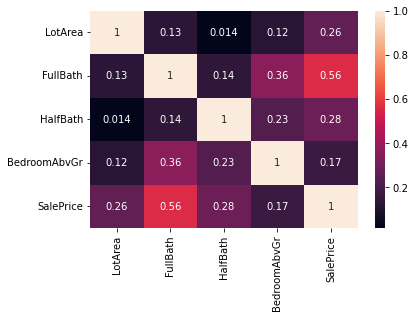

In [11]:
sns.heatmap(X1.corr(), annot=True)

### Linear Regression model 

In [12]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [13]:
lr.intercept_

56988.92886391193

In [14]:
lr.coef_

array([ 1.63090403e+00,  7.81011442e+04,  3.65271164e+04, -1.02701293e+04])

In [15]:
test=pd.read_csv('test.csv')
x_test= test[['LotArea','FullBath','HalfBath', 'BedroomAbvGr']]
x_test

,LotArea,FullBath,HalfBath,BedroomAbvGr
0,11622,1,0,2
1,14267,1,1,3
2,13830,2,1,3
3,9978,2,1,3
4,5005,2,0,2
...,...,...,...,...
1454,1936,1,1,3
1455,1894,1,1,3
1456,20000,1,0,4
1457,10441,1,0,3


In [16]:
y_pred=lr.predict(x_test)

In [17]:
testsample=pd.read_csv("sample_submission.csv")
ytest=testsample['SalePrice']
ytest

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

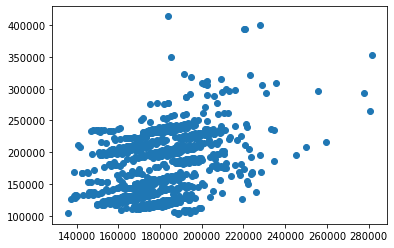

In [18]:
plt.scatter(ytest,y_pred)

In [19]:
r=np.array([14267,1,1,3]).reshape(1,-1)

lr.predict(r)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([164074.9093251])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
mae = mean_absolute_error(y_true=ytest,y_pred=y_pred)
mse = mean_squared_error(y_true=ytest,y_pred=y_pred) 
rmse = mean_squared_error(y_true=ytest,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 40124.10496137296
MSE: 2104391574.9652038
RMSE: 45873.64793609948
